### Student Information
Name:廖哲暉

Student ID: 111062534

GitHub ID: HuiXillya

Kaggle name: che-hui liao (Hui)

Kaggle private scoreboard snapshot:

![Snapshot](snapshot.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("../data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("../data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("../data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("../data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
### testing data
anger_test = pd.read_csv("../data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("../data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("../data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("../data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()


,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


### Exercise1

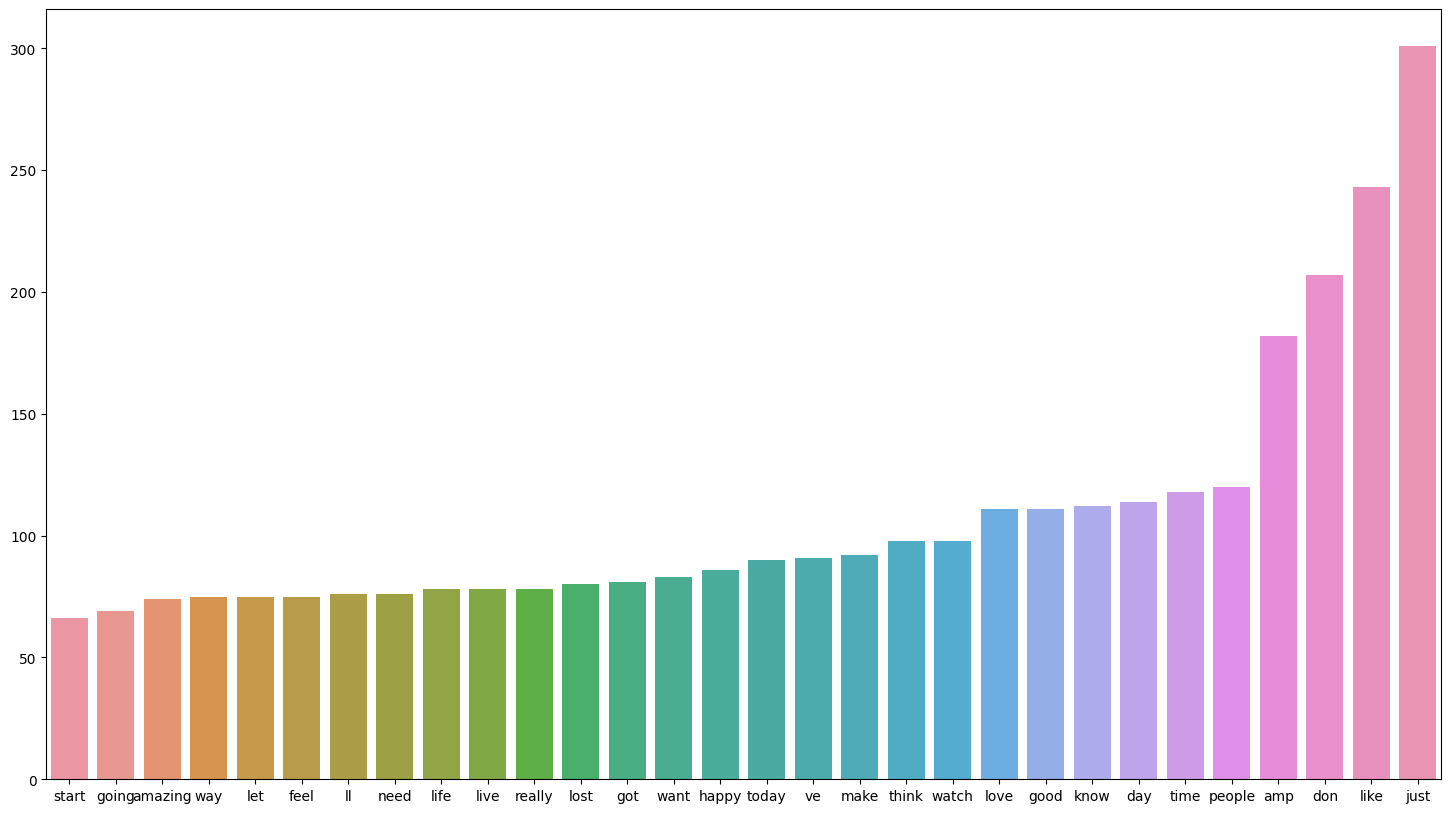

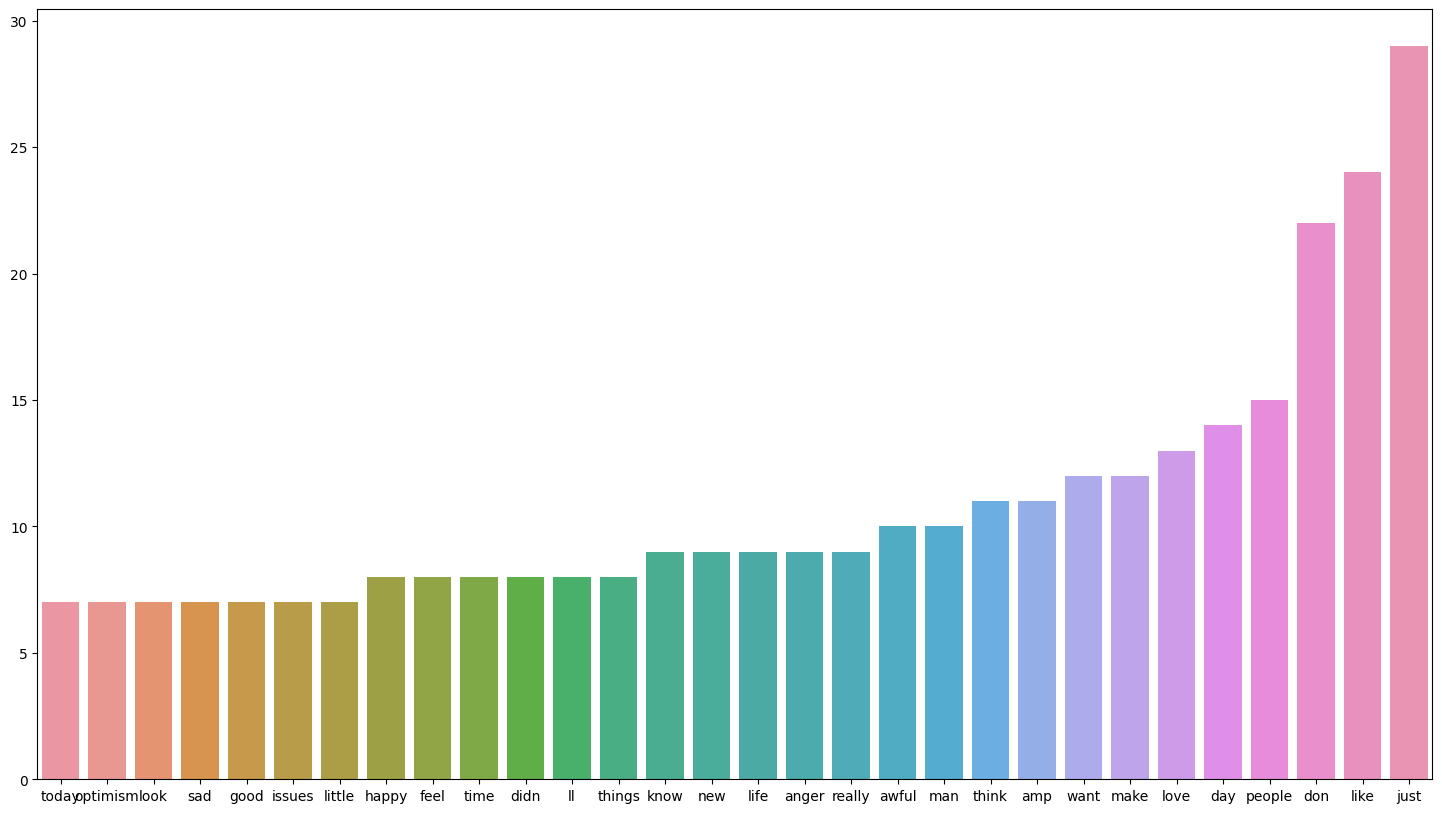

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Answer here
from sklearn.feature_extraction.text import CountVectorizer

# count_vect_train = CountVectorizer(stop_words='english')
# count_vect_test = CountVectorizer(stop_words='english')
def token(data):
    pass
def plotTop30(raw_data):
    count_vect = CountVectorizer(stop_words='english')
    X_counts = count_vect.fit_transform(raw_data.text) #learn the vocabulary and return document-term matrix
    term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
    n = 30
    terms_idx = np.argsort(term_frequencies)[-n:]
    plt.subplots(figsize=(18, 10))
    g = sns.barplot(x=count_vect.get_feature_names_out()[list(terms_idx)], 
        y=term_frequencies[list(terms_idx)])
    pass
plotTop30(train_df)
plotTop30(test_df)

### Exercise2


In [3]:
### Begin Assignment Here
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english',max_features=1000)
tfidf_X = vectorizer.fit_transform(train_df['text'])
print(vectorizer.get_feature_names_out()[100:110])

['blue' 'blues' 'body' 'boiling' 'book' 'boss' 'bought' 'bout' 'boy'
 'break']


### Exercise3

In [4]:
# Answer here
'''
16 of anger text were predicted as fear
18 of fear text were predicted as anger

mabey 'fear' and 'anger' are easily confused
''' 

"\n16 of anger text were predicted as fear\n18 of fear text were predicted as anger\n\nmabey 'fear' and 'anger' are easily confused\n"

In [5]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)
DT_model = DT_model.fit(X_train, y_train)

y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

/home/hui/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


### Exercise4

In [6]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
y_train = train_df['emotion']
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
acc_test_nb = accuracy_score(y_true=y_test, y_pred=y_test_pred)
print('testing accuracy: {}'.format(round(acc_test_nb, 2)))
print(classification_report(y_true=y_test, y_pred=y_test_pred))

testing accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



### Exercise 5

In [ ]:
# The performance of these two models is similar.
# Since we were using bag of words, the feature only represents whether a certain text appears. 
# So these two will works almost same. 

### Exercise 6

In [7]:
# the training loss is much lower then validating loss 
# its seem to be overfitting

### Exercise 7

In [8]:

# change onehot encoding to this vector


### Exercise 8

/home/hui/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hui/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


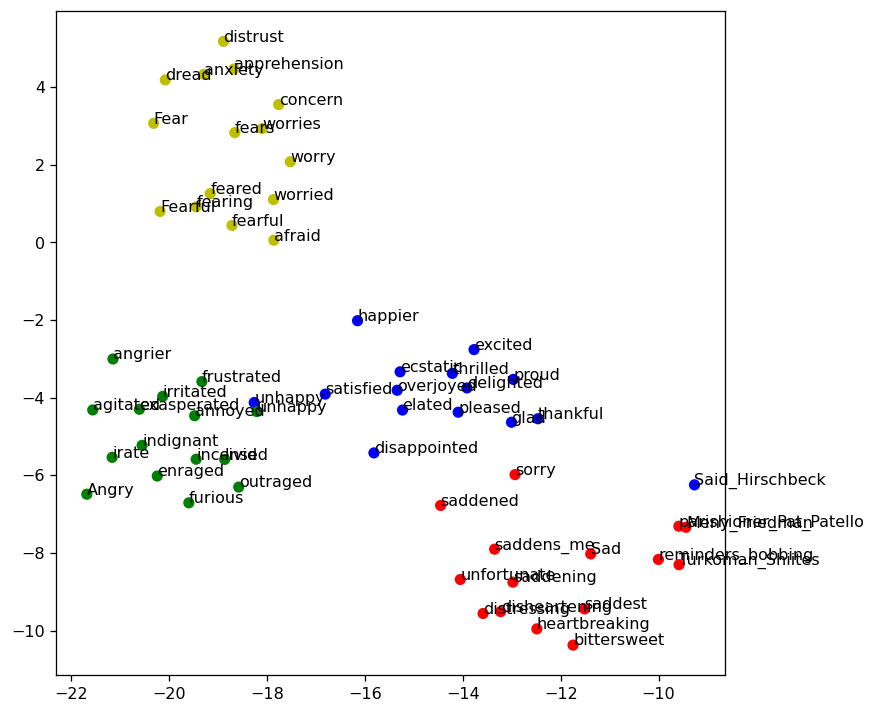

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import KeyedVectors

model_path = "../GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
# Answer here
model = w2v_google_model
size = 200
all_word = list(model.index_to_key)
word_list = ['happy', 'angry', 'sad', 'fear']
topn = 15
cn = topn
target_size = 60
my_words = []
for w in word_list:
    my_words += [word_ for word_, sim_ in w2v_google_model.most_similar(w, topn=topn)]

tsne = TSNE(n_components=2, metric='cosine', random_state=28)
word_train = my_words + all_word[:size]
X_train = model[word_train]

X_tsne = tsne.fit_transform(X_train)


color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(my_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Part 2

In [10]:
import tensorflow as tf
from hw_dataset import load_dataset

dtss,dts_test = load_dataset()
dtss_valid = [x.take(100)  for x in dtss]
dtss_train = [x.skip(100)  for x in dtss]
valid_dataset =  tf.data.Dataset.sample_from_datasets(dtss_valid).batch(128)
unbalance_dataset = tf.data.Dataset.sample_from_datasets(dtss_train)


2023-12-30 20:04:27.067638: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-30 20:04:27.773452: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-12-30 20:05:01.644758: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-30 20:05:01.666866: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [11]:
# model

from keras.models import Model
from keras.layers import Input, Dense, BatchNormalization
from keras.layers import ReLU, Softmax
from keras.regularizers import l1
def create_model():
    model_input = Input(shape=(500))  # 500
    X = model_input
    X_W1 = Dense(units=256,use_bias=False,kernel_regularizer=l1(0.01))(X)  # 128
    H1 = ReLU()(X_W1)
    H1_W1 = Dense(units=128)(H1)  # 64
    H1_BN1 = BatchNormalization()(H1_W1)
    H1_A = ReLU()(H1_BN1)
    H2_W1 = Dense(units=64)(H1_A)  # 64
    H2_BN1 = BatchNormalization()(H2_W1)
    H2_A = ReLU()(H2_BN1)
    H3_W1 = Dense(units=8)(H2_A)  # 4
    H3 = Softmax()(H3_W1)

    model_output = H3

    model = Model(inputs=[model_input], outputs=[model_output])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
# show model construction
model_1 = create_model()
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 256)               128000    
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 re_lu_1 (ReLU)              (None, 128)               0         
                                                             

In [12]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('../logs/training_log.csv')

# training setting
epochs = 10
batch_size = 128
train_dataset = unbalance_dataset.shuffle(240000*5).batch(128)
# training!
history = model_1.fit(train_dataset, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = valid_dataset)
print('balance training finish')

Epoch 1/10


2023-12-30 20:05:13.204062: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1143959 of 1200000
2023-12-30 20:05:14.659201: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2023-12-30 20:05:15.364494: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-12-30 20:05:15.367351: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f1fad4d1320 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-30 20:05:15.367363: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-12-30 20:05:15.370480: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-30 20:05:15

11366/11366 [==============================] - 65s 5ms/step - loss: 2.4636 - accuracy: 0.4520 - val_loss: 2.8624 - val_accuracy: 0.2159
Epoch 2/10


2023-12-30 20:06:17.674355: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1140925 of 1200000


   29/11366 [..............................] - ETA: 1:03 - loss: 2.3041 - accuracy: 0.3761

2023-12-30 20:06:19.202709: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


11366/11366 [==============================] - 63s 5ms/step - loss: 2.1463 - accuracy: 0.4600 - val_loss: 2.7163 - val_accuracy: 0.2406
Epoch 3/10


2023-12-30 20:07:20.619545: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1147865 of 1200000


   31/11366 [..............................] - ETA: 1:02 - loss: 2.2660 - accuracy: 0.3841

2023-12-30 20:07:21.962128: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


11366/11366 [==============================] - 64s 5ms/step - loss: 2.1145 - accuracy: 0.4617 - val_loss: 2.7222 - val_accuracy: 0.2449
Epoch 4/10


2023-12-30 20:08:24.482497: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1149800 of 1200000


   20/11366 [..............................] - ETA: 1:46 - loss: 2.2645 - accuracy: 0.3824

2023-12-30 20:08:25.821917: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


11366/11366 [==============================] - 60s 4ms/step - loss: 2.1023 - accuracy: 0.4628 - val_loss: 2.7093 - val_accuracy: 0.2304
Epoch 5/10


2023-12-30 20:09:24.804941: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1149327 of 1200000


   29/11366 [..............................] - ETA: 1:03 - loss: 2.2679 - accuracy: 0.3904

2023-12-30 20:09:26.251588: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


11366/11366 [==============================] - 60s 4ms/step - loss: 2.0916 - accuracy: 0.4633 - val_loss: 2.7324 - val_accuracy: 0.2449
Epoch 6/10


2023-12-30 20:10:25.047807: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1149802 of 1200000


   28/11366 [..............................] - ETA: 1:07 - loss: 2.2491 - accuracy: 0.3853

2023-12-30 20:10:26.435818: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


11366/11366 [==============================] - 67s 5ms/step - loss: 2.0879 - accuracy: 0.4640 - val_loss: 2.6503 - val_accuracy: 0.2667
Epoch 7/10


2023-12-30 20:11:31.883169: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1149639 of 1200000


   29/11366 [..............................] - ETA: 1:03 - loss: 2.2602 - accuracy: 0.3796

2023-12-30 20:11:33.221150: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


11366/11366 [==============================] - 63s 5ms/step - loss: 2.0833 - accuracy: 0.4647 - val_loss: 2.6070 - val_accuracy: 0.2580
Epoch 8/10


2023-12-30 20:12:34.740498: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1150021 of 1200000


   29/11366 [..............................] - ETA: 1:03 - loss: 2.2513 - accuracy: 0.3863

2023-12-30 20:12:36.077505: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


11366/11366 [==============================] - 63s 5ms/step - loss: 2.0800 - accuracy: 0.4647 - val_loss: 2.6632 - val_accuracy: 0.2507
Epoch 9/10


2023-12-30 20:13:37.886651: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1150528 of 1200000


   20/11366 [..............................] - ETA: 1:38 - loss: 2.2032 - accuracy: 0.3879

2023-12-30 20:13:39.196476: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


11366/11366 [==============================] - 62s 4ms/step - loss: 2.0752 - accuracy: 0.4651 - val_loss: 2.7277 - val_accuracy: 0.2638
Epoch 10/10


2023-12-30 20:14:39.734853: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1152894 of 1200000


   27/11366 [..............................] - ETA: 1:15 - loss: 2.2913 - accuracy: 0.3860

2023-12-30 20:14:41.042389: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


11366/11366 [==============================] - 63s 5ms/step - loss: 2.0726 - accuracy: 0.4660 - val_loss: 2.6606 - val_accuracy: 0.2536
balance training finish


In [13]:
from sklearn.preprocessing import LabelBinarizer
mlb = LabelBinarizer()
df1 = pd.read_csv('../kaggle-data/my_training_data.csv',lineterminator='\n')
df2 = pd.read_csv('../kaggle-data/my_testing_data.csv',lineterminator='\n')
mlb.fit(df1['emotion'])


LabelBinarizer()

In [ ]:
temp = []
for x in dts_test.batch(128):
    y = model_1.predict(x,verbose=0)
    temp += mlb.inverse_transform(y).tolist()
df2['emotion'] = temp
df2[['id','emotion']].to_csv('./submit.csv', index=False)

# Part3
#### Preprocess 
1. load data from json file
2. load labels from csv file
3. change text to lower class
```
tweet_text = temp['text'].lower()
```
4. clean the text data, there are some '\r' and '\n' in the text
``` = pytyon
tweet_text = tweet_text.replace('\r', '')
tweet_text = tweet_text.replace('\n', '')
```

6. save text and labels to new csv
#### Feature engineering
1. use 'nltk' to tokenlize the text 
2. use TF-idf to change text to vector, we select top 500 vector
```
TFIDF_500 = TfidfVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
text2array = TFIDF_500.build_tokenizer()
TFIDF_500.fit(pd.concat([raw_training_df['text'],raw_testing_df['text']]))
vectors = TFIDF_500.transform(raw_testing_df['text']).toarray()
```
3. use one-hot encoding to encode the label
```
mlb = LabelBinarizer()
mlb.fit(raw_training_df['emotion'])
```
4. save each label to tf data set
```
semo_dataset.save('../kaggle-data/{}'.format(emotion))
```
#### Model
1. create nn model
2. add batch-normalize
#### Training and predict
1. sample training data from dataset
2. split validation set
3. decode prediction to label
### Other Thing I Have done
1. try google word2vec to change each tweet into 300*300 vector, but it seems there is something wrong with my memory
2. try to make the dataset balance.
3. add some regulization to model
